In [1]:
from body_matrix import load
from body_matrix import infer
from body_matrix import process

video, frame_counts, fps, sample_frame = load.video(
    "/Users/troydo42/Desktop/Body_Matrixes/samples/sample02.mp4", 
    -90, 
    1
)

keypoints_model, keypoints_transform = load.keypoints_model("cpu")
selected_box, keypoints = infer.detect_main_target(
    sample_frame, "cpu", 0.8, keypoints_model, keypoints_transform
)

selected_kps = process.keypoints_filter(
    [
        'left_shoulder','right_shoulder', 
        'left_hip', 'right_hip',  
        'left_elbow','right_elbow',
        'left_wrist', 'right_wrist',
        'left_ankle', 'right_ankle'], 
    keypoints
)

segment_model, segment_transform = load.segment_model("cpu")
mask, mask_image, bool_mask = infer.segment_selected_target(
    sample_frame, "cpu", selected_box, 0.9, segment_model, segment_transform
)

segment_area = process.segmentation_area(
    sample_frame, 
    bool_mask
)

Found  3  person in the frame
Distances:  [4.6946258544921875, 357.71270751953125, 328.79632568359375]
Areas:  [309102.5849272795, 7238.688030660152, 4190.567056313157]
FOCUSES:  [65841.79325632645, 20.23603824660022, 12.745176052684391]
Select keypoint index 0
Found  7  person in the frame
[384.28985595703125, 757.6371459960938, 687.038330078125, 1751.9239501953125]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[868.923583984375, 872.0135498046875, 930.5077514648438, 992.1439819335938]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[863.081787109375, 787.0054931640625, 1087.1761474609375, 962.7617797851562]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[9.776000022888184, 858.37646484375, 154.00531005859375, 933.3391723632812]
[384.4972839355469, 760.8311767578125, 694.1134643554688, 1759.17236328125]
[681.4767456054688, 970.3965454101562, 845.8213500976562, 1075.564453125]
[384.4972839355469, 760

In [2]:
print(selected_kps)

{'left_shoulder': [428.4195556640625, 955.752197265625], 'right_shoulder': [609.8690795898438, 957.1908569335938], 'left_elbow': [428.4195556640625, 1076.5889892578125], 'right_elbow': [650.191162109375, 1099.60546875], 'left_wrist': [494.6630554199219, 1102.4825439453125], 'right_wrist': [562.3466186523438, 1116.8677978515625], 'left_hip': [475.94207763671875, 1242.0201416015625], 'right_hip': [594.0282592773438, 1243.458740234375], 'left_ankle': [517.7042846679688, 1689.4034423828125], 'right_ankle': [615.62939453125, 1657.755859375]}


In [3]:
ls = selected_kps['left_shoulder']
rs = selected_kps['right_shoulder']

def two_points_linear_constant(a, b):
    aX = a[0]
    aY = a[1]
    bX = b[0]
    bY = b[1]
    alpha = (bY - aY)/(bX - aX)
    beta = (bX * aY - bY * aX)/(bX - aX)
    return alpha, beta

alpha, beta = two_points_linear_constant(ls, rs)
print(alpha, beta)

0.007928704561149516 952.3553851805457


In [4]:
def find_segment_line(segment_area, alpha, beta):
    line_coordinates = []
    
    for idx, position in enumerate(sorted(segment_area)):
        expectedY = alpha * position[0] + beta
        if position[1] == int(expectedY):
            line_coordinates.append(
                [position[0], position[1]]
            )
    return line_coordinates

In [5]:
shoulder_line_coordinates = find_segment_line(segment_area, alpha, beta)
shoulder_line_coordinates

[[403, 955],
 [404, 955],
 [405, 955],
 [406, 955],
 [407, 955],
 [408, 955],
 [409, 955],
 [410, 955],
 [411, 955],
 [412, 955],
 [413, 955],
 [414, 955],
 [415, 955],
 [416, 955],
 [417, 955],
 [418, 955],
 [419, 955],
 [420, 955],
 [421, 955],
 [422, 955],
 [423, 955],
 [424, 955],
 [425, 955],
 [426, 955],
 [427, 955],
 [428, 955],
 [429, 955],
 [430, 955],
 [431, 955],
 [432, 955],
 [433, 955],
 [434, 955],
 [435, 955],
 [436, 955],
 [437, 955],
 [438, 955],
 [439, 955],
 [440, 955],
 [441, 955],
 [442, 955],
 [443, 955],
 [444, 955],
 [445, 955],
 [446, 955],
 [447, 955],
 [448, 955],
 [449, 955],
 [450, 955],
 [451, 955],
 [452, 955],
 [453, 955],
 [454, 955],
 [455, 955],
 [456, 955],
 [457, 955],
 [458, 955],
 [459, 955],
 [460, 956],
 [461, 956],
 [462, 956],
 [463, 956],
 [464, 956],
 [465, 956],
 [466, 956],
 [467, 956],
 [468, 956],
 [469, 956],
 [470, 956],
 [471, 956],
 [472, 956],
 [473, 956],
 [474, 956],
 [475, 956],
 [476, 956],
 [477, 956],
 [478, 956],
 [479, 956],

In [6]:
print(ls, rs)

[428.4195556640625, 955.752197265625] [609.8690795898438, 957.1908569335938]


In [7]:
if ls[0] < rs[0]:
    print("BACK")
    shoulder_kps = {
        'left_shoulder': shoulder_line_coordinates[0],
        'right_shoulder': shoulder_line_coordinates[-1]
    }

elif ls[0] > rs[0]:
    print("FRONT")
    shoulder_kps = {
        'left_shoulder': shoulder_line_coordinates[-1],
        'right_shoulder': shoulder_line_coordinates[0]
    }
        
        
shoulder_kps

BACK


{'left_shoulder': [403, 955], 'right_shoulder': [642, 957]}

[403, 955]
[642, 957]


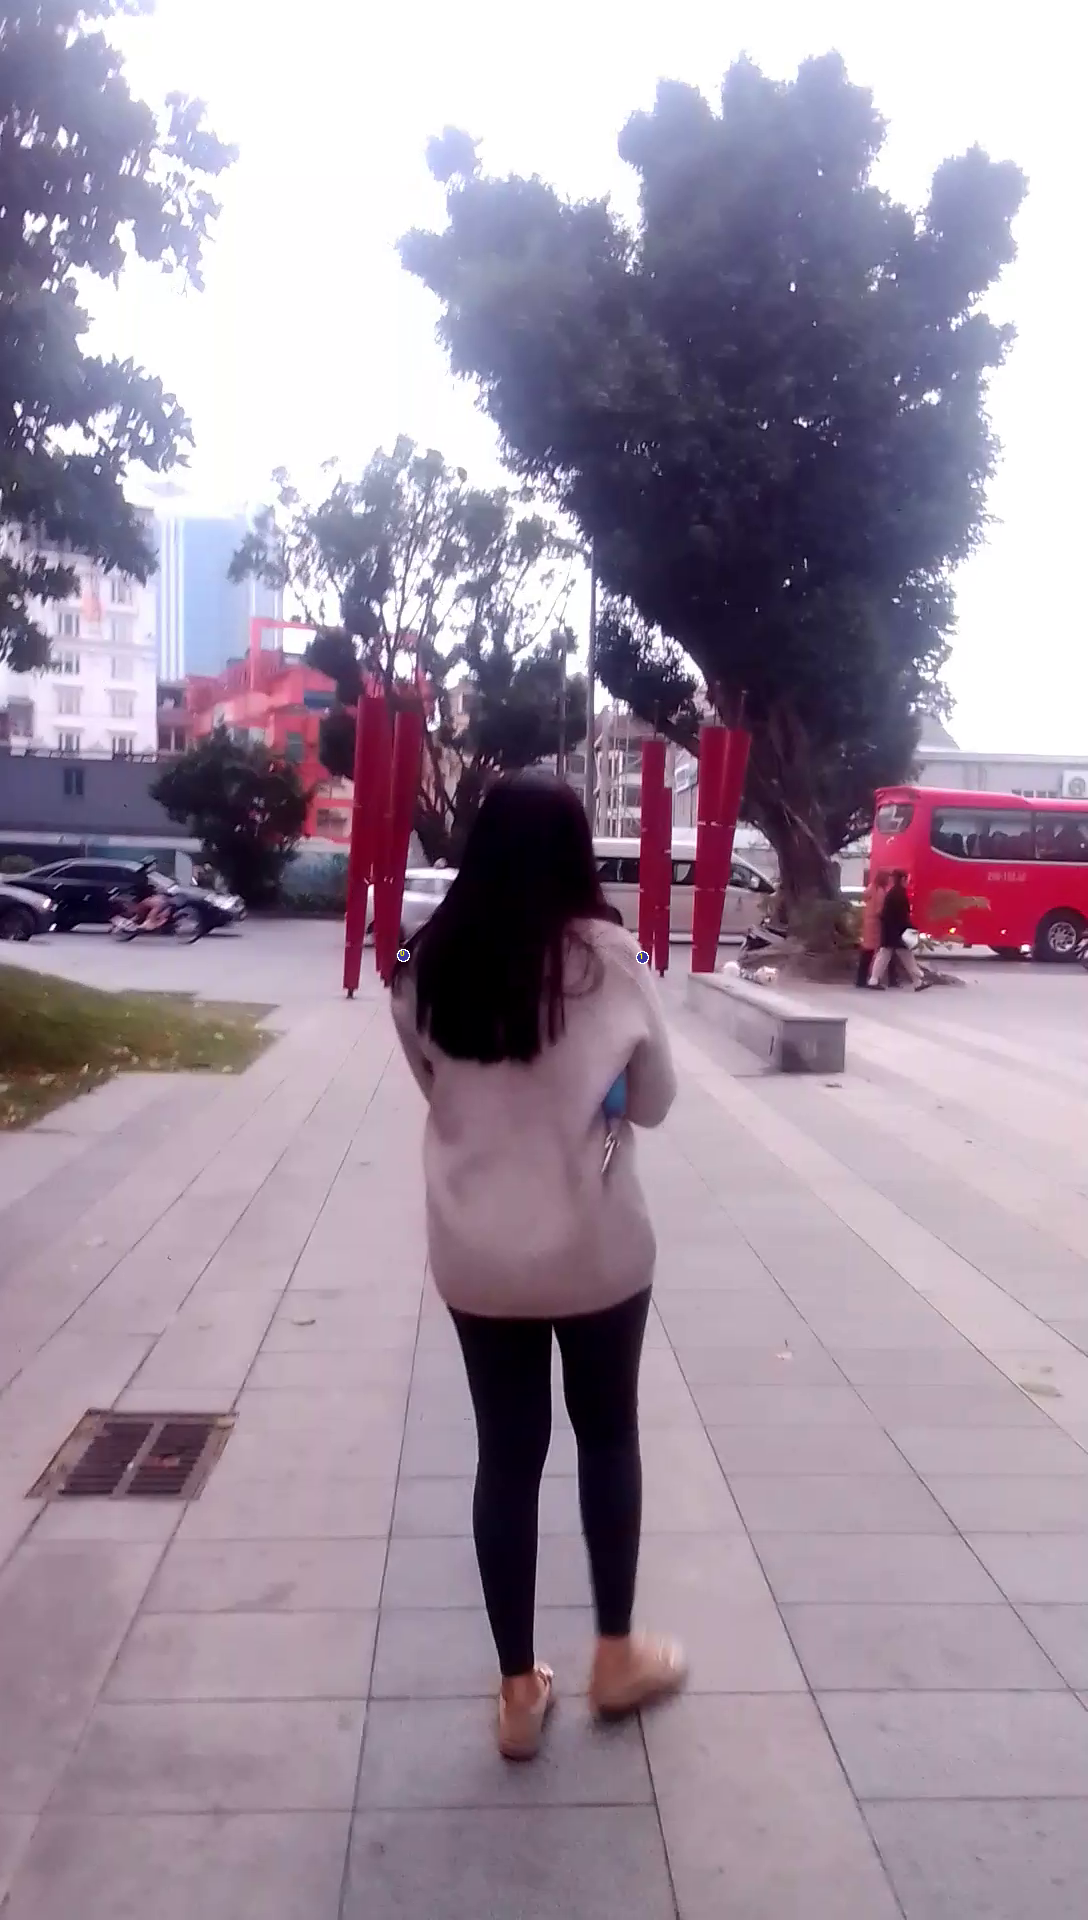

In [8]:
from body_matrix import draw 

output = draw.keypoint_markers(
    coordinates=shoulder_kps,
    image=sample_frame, 
    label_font="/path/Roboto-Bold.ttf"
)
output

In [9]:
from body_matrix import measure

middle_shoulder = measure.find_middle_point(
    shoulder_kps['left_shoulder'], 
    shoulder_kps['right_shoulder']
)

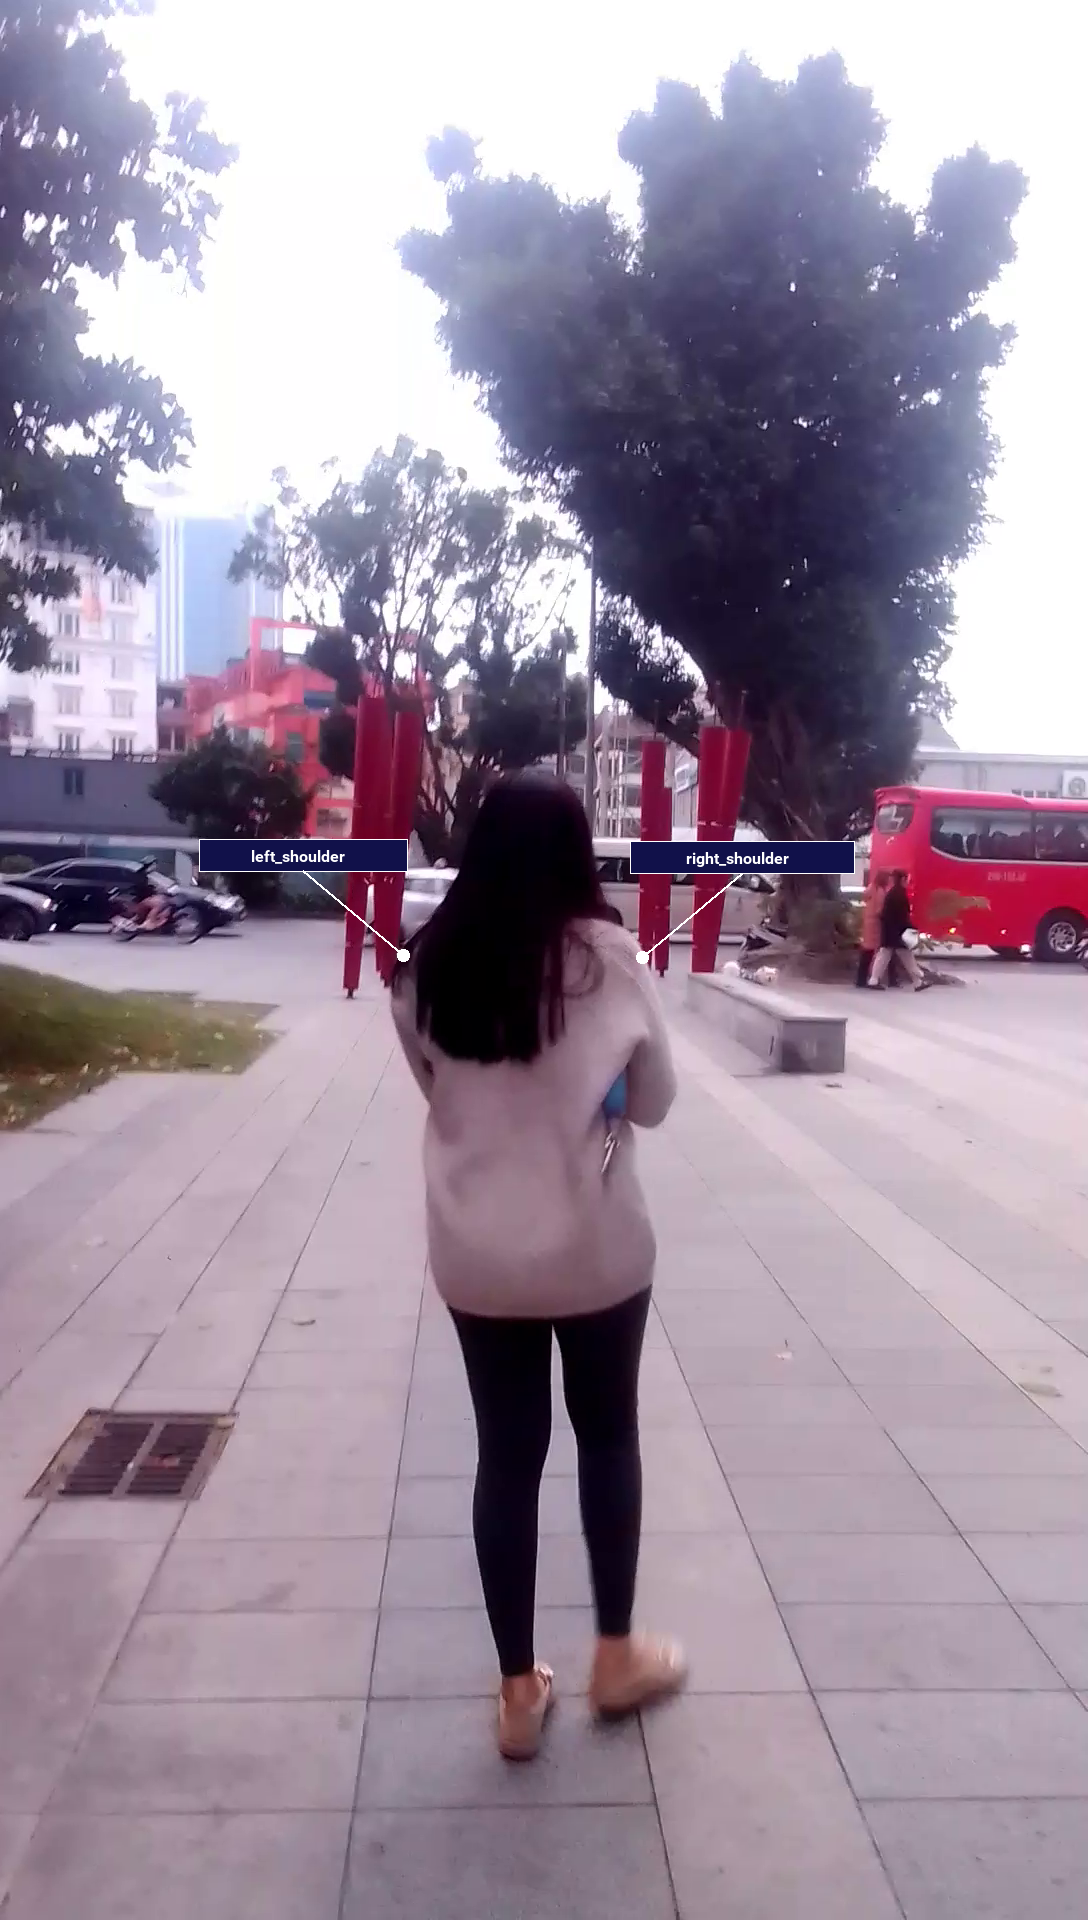

In [10]:
float_sample = sample_frame
for key, value in shoulder_kps.items():
    float_sample = draw.floating_rectangle_label(
        image=float_sample, 
        longitude_coordinate=middle_shoulder[0],
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    ) 
    
float_sample

In [11]:
hip_alpha, hip_beta = two_points_linear_constant(
    selected_kps['left_hip'], 
    selected_kps['right_hip']
)

print(hip_alpha, hip_beta)

0.012182616228464628 1236.2219219227363


In [12]:
hip_line_coordinates = find_segment_line(segment_area, hip_alpha, hip_beta)
hip_line_coordinates

[[429, 1241],
 [430, 1241],
 [431, 1241],
 [432, 1241],
 [433, 1241],
 [434, 1241],
 [435, 1241],
 [436, 1241],
 [437, 1241],
 [438, 1241],
 [439, 1241],
 [440, 1241],
 [441, 1241],
 [442, 1241],
 [443, 1241],
 [444, 1241],
 [445, 1241],
 [446, 1241],
 [447, 1241],
 [448, 1241],
 [449, 1241],
 [450, 1241],
 [451, 1241],
 [452, 1241],
 [453, 1241],
 [454, 1241],
 [455, 1241],
 [456, 1241],
 [457, 1241],
 [458, 1241],
 [459, 1241],
 [460, 1241],
 [461, 1241],
 [462, 1241],
 [463, 1241],
 [464, 1241],
 [465, 1241],
 [466, 1241],
 [467, 1241],
 [468, 1241],
 [469, 1241],
 [470, 1241],
 [471, 1241],
 [472, 1241],
 [473, 1241],
 [474, 1241],
 [475, 1242],
 [476, 1242],
 [477, 1242],
 [478, 1242],
 [479, 1242],
 [480, 1242],
 [481, 1242],
 [482, 1242],
 [483, 1242],
 [484, 1242],
 [485, 1242],
 [486, 1242],
 [487, 1242],
 [488, 1242],
 [489, 1242],
 [490, 1242],
 [491, 1242],
 [492, 1242],
 [493, 1242],
 [494, 1242],
 [495, 1242],
 [496, 1242],
 [497, 1242],
 [498, 1242],
 [499, 1242],
 [500,

In [13]:
lh = selected_kps['left_hip']
rh = selected_kps['right_hip']
lw = selected_kps['left_wrist']
rw = selected_kps['right_wrist']
middle_hip = measure.find_middle_point(
    lh, rh
)

print(middle_hip, lw, rw, lh, rh)

(534.9851684570312, 1242.7394409179688) [494.6630554199219, 1102.4825439453125] [562.3466186523438, 1116.8677978515625] [475.94207763671875, 1242.0201416015625] [594.0282592773438, 1243.458740234375]


In [14]:
if lw[1] > lh[1]:
    precise_rh = hip_line_coordinates[-1]
    precise_lhX = 2 * middle_hip[0] - rh[0]
    precise_lhY = hip_alpha * precise_lhX + hip_beta
    precise_lh = [int(precise_lhX), int(precise_lhY)]
    hip_kps = {
        'left_hip': precise_lh,
        'right_hip': precise_rh
    }
    print("low left hand", hip_kps)
    
elif rw[1] > rh[1]:
    precise_lh = hip_line_coordinates[0]
    precise_rhX = 2 * middle_hip[0] - precise_lh[0]
    precise_rhY = hip_alpha * precise_rhX + hip_beta
    precise_rh = [int(precise_rhX), int(precise_rhY)] 
    
    hip_kps = {
        'left_hip': precise_lh,
        'right_hip': precise_rh
    }
    print("low right hand", hip_kps)
    
else:
    hip_kps = {
        'left_hip': hip_line_coordinates[0],
        'right_hip': hip_line_coordinates[-1]
    }
    print("both hand high", hip_kps)

both hand high {'left_hip': [429, 1241], 'right_hip': [651, 1244]}


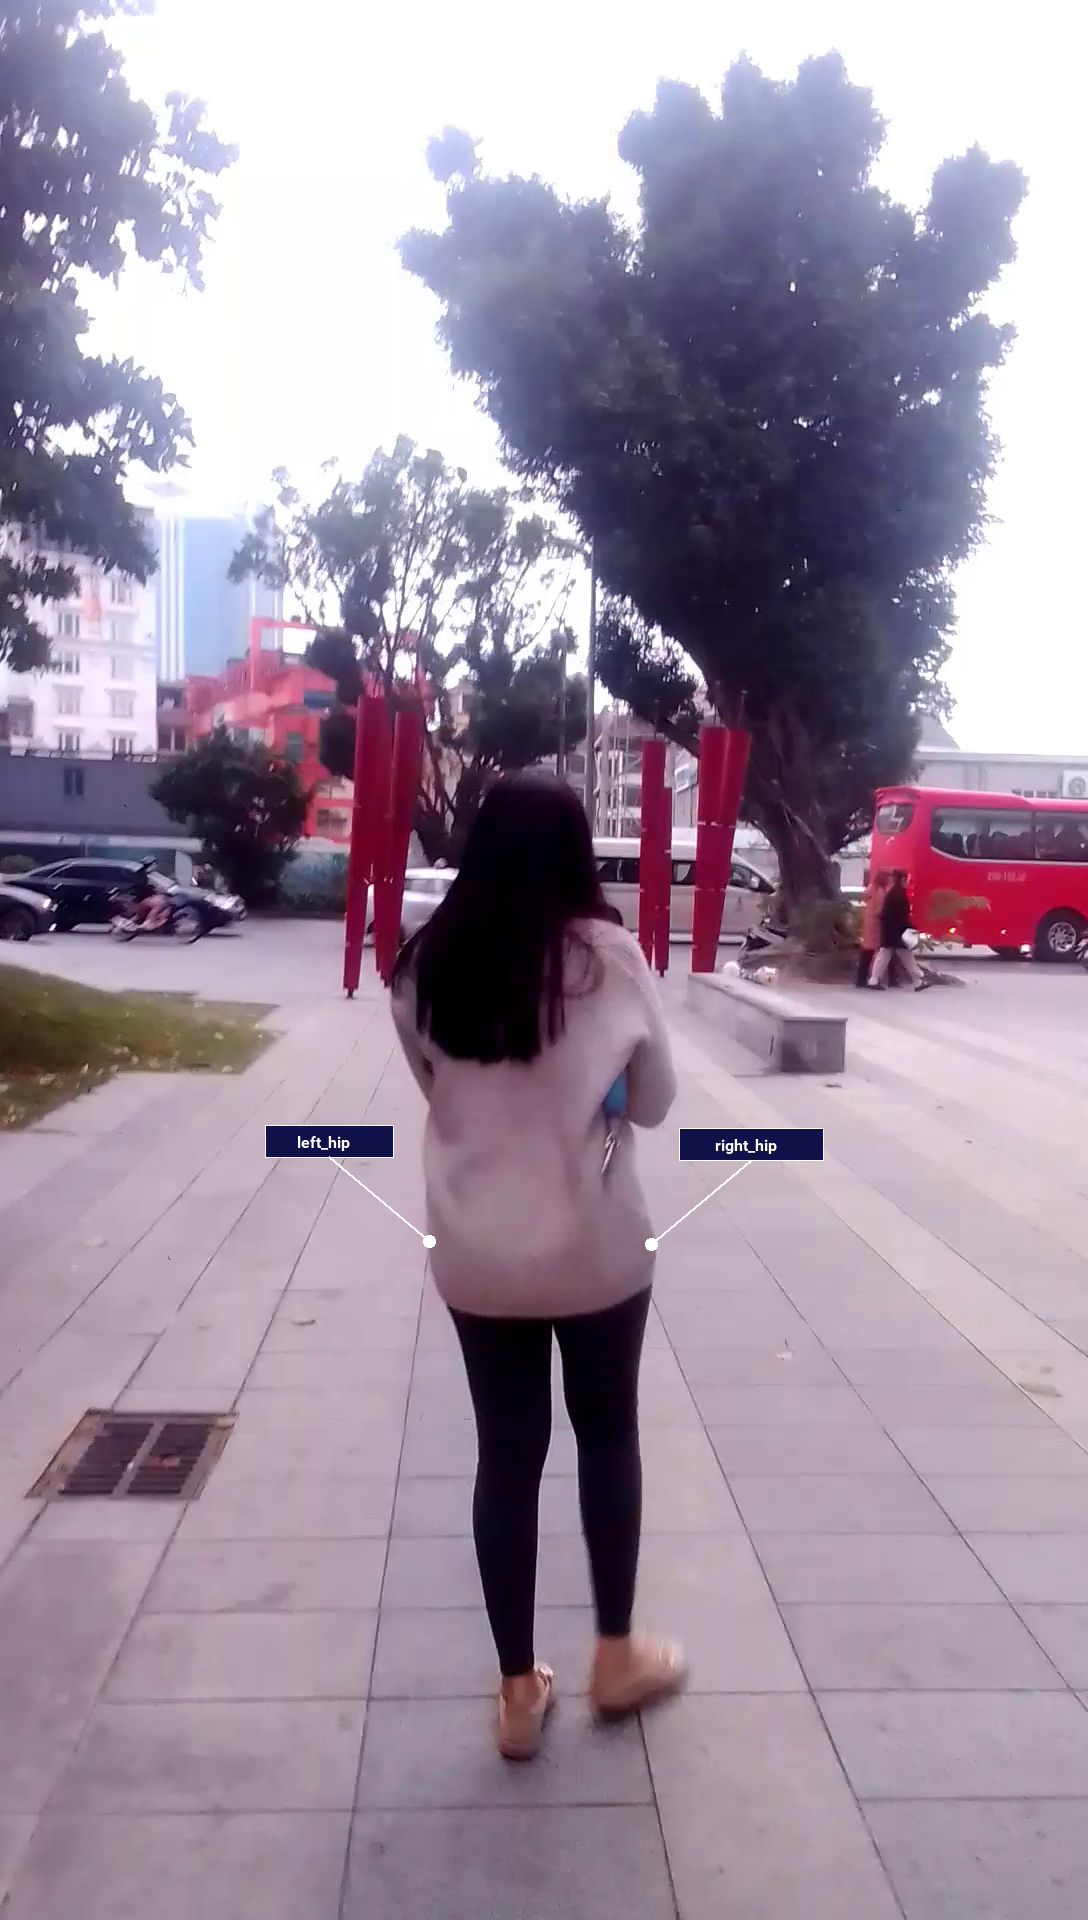

In [15]:
hip_sample = sample_frame

for key, value in hip_kps.items():
    hip_sample = draw.floating_rectangle_label(
        image=hip_sample, 
        longitude_coordinate=middle_shoulder[0],
        point=value, 
        label_text=key, 
        label_size=16, 
        label_color="#ffffff", 
        label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
        background_color="#11114A"
    )

hip_sample

In [16]:
shoulder_kps

{'left_shoulder': [403, 955], 'right_shoulder': [642, 957]}

In [17]:
hip_kps

{'left_hip': [429, 1241], 'right_hip': [651, 1244]}

In [18]:
updated_kps = {}
updated_kps.update(shoulder_kps)
updated_kps.update(hip_kps)

In [19]:
updated_kps

{'left_shoulder': [403, 955],
 'right_shoulder': [642, 957],
 'left_hip': [429, 1241],
 'right_hip': [651, 1244]}

In [20]:
def draw_floating_keypoint_on_frame(points, frame):
    sample = frame
    for key, value in points.items():
        sample = draw.floating_rectangle_label(
            image=sample, 
            longitude_coordinate=middle_shoulder[0],
            point=value, 
            label_text=key, 
            label_size=16, 
            label_color="#ffffff", 
            label_font="/Users/troydo42/Desktop/Body_Matrixes/Roboto-Bold.ttf",
            background_color="#11114A"
        )

    return sample

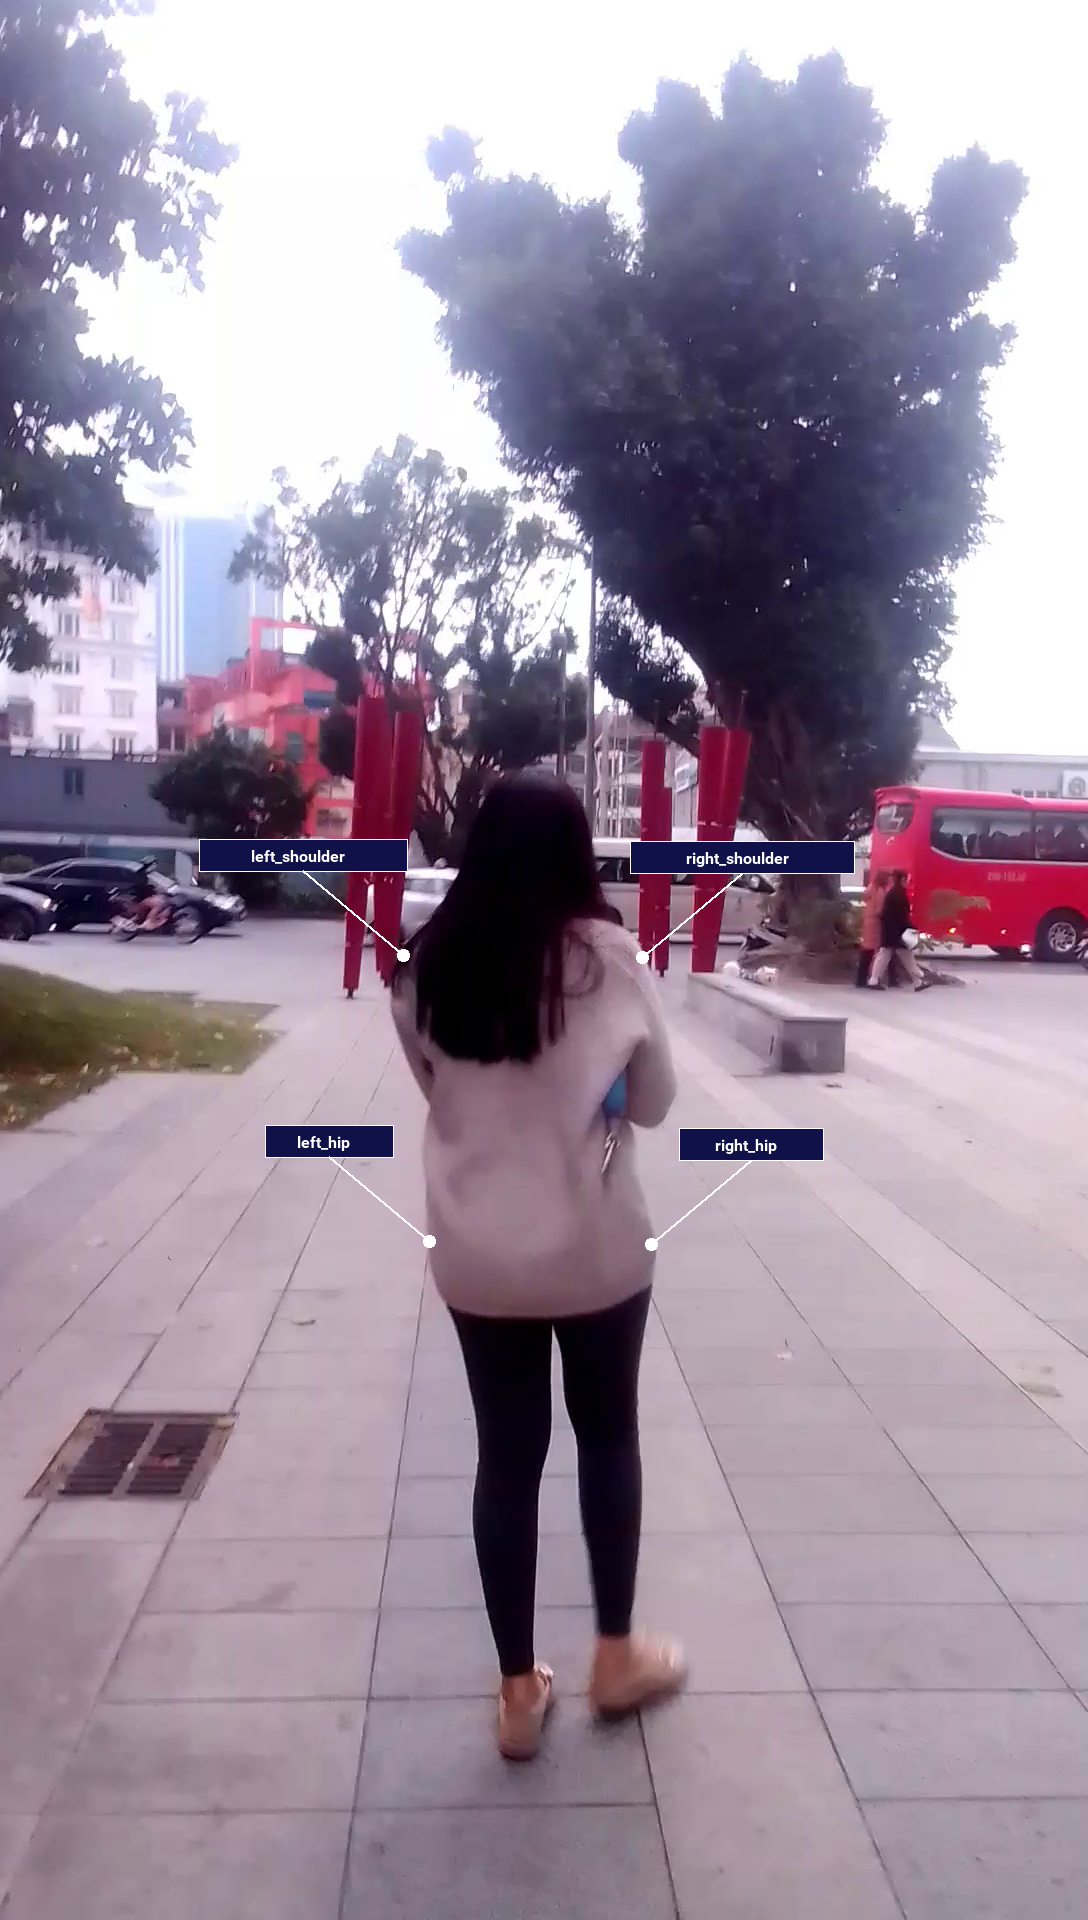

In [21]:
result = draw_floating_keypoint_on_frame(updated_kps, sample_frame)
result

In [22]:
hip_length = measure.two_points_distance(
    updated_kps['left_hip'],
    updated_kps['right_hip']
)
hip_length

222.02026934494066

In [23]:
shoulder_length = measure.two_points_distance(
    updated_kps['left_shoulder'],
    updated_kps['right_shoulder']
)
shoulder_length

239.0083680543424

In [24]:
middle_shoulder = measure.find_middle_point(
    updated_kps['left_shoulder'],
    updated_kps['right_shoulder']
)
middle_shoulder

(522.5, 956.0)

In [25]:
middle_hip = measure.find_middle_point(
    updated_kps['left_hip'],
    updated_kps['right_hip']
)
middle_hip

(540.0, 1242.5)

In [26]:
middle_ankle = measure.find_middle_point(
    selected_kps['left_ankle'],
    selected_kps['right_ankle']
)

middle_ankle

(566.6668395996094, 1673.5796508789062)

In [27]:
back_length = measure.two_points_distance(
    middle_shoulder, middle_hip
)
back_length

287.0339701150371

In [28]:
leg_length = measure.two_points_distance(
    middle_hip, middle_ankle
)
leg_length

431.9036764558864

In [29]:
print(shoulder_length, hip_length)

239.0083680543424 222.02026934494066


In [30]:
print(back_length, leg_length)

287.0339701150371 431.9036764558864


In [32]:
from body_matri
score = score.SHA_score(
    shoulder_length, 
    hip_length, 
    back_length, 
    leg_length
)

NameError: name 'score' is not defined